In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
path_pipeline_r2g = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/pipeline/r2g.csv"
path_downloaded_r2g = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/downloaded/r2g.csv"
path_inferred_r2g = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/inferred/r2g.csv"

In [63]:
path_pipeline_connections = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/pipeline/cicero_connections.csv"
path_downloaded_connections = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/downloaded/cicero_connections.csv"
path_inferred_connections = "/cellar/users/aklie/data/datasets/atac_v1_E18_brain_fresh_5k/analysis/celloracle/tutorial/inferred/cicero_connections.csv"

In [64]:
# Load in r2g
pipeline_r2g = pd.read_csv(path_pipeline_r2g)
downloaded_r2g = pd.read_csv(path_downloaded_r2g)
inferred_r2g = pd.read_csv(path_inferred_r2g)

In [65]:
# How many links are in each r2g?
print("Pipeline r2g: ", len(pipeline_r2g))
print("Downloaded r2g: ", len(downloaded_r2g))
print("Inferred r2g: ", len(inferred_r2g))

Pipeline r2g:  15876
Downloaded r2g:  15779
Inferred r2g:  15877


In [68]:
# How many scores are not 1
print("Pipeline r2g: ", len(pipeline_r2g[pipeline_r2g["score"] != 1]))
print("Downloaded r2g: ", len(downloaded_r2g[downloaded_r2g["score"] != 1]))
print("Inferred r2g: ", len(inferred_r2g[inferred_r2g["score"] != 1]))

Pipeline r2g:  88
Downloaded r2g:  0
Inferred r2g:  88


In [59]:
pipeline_r2g

,cre,gene,score,pval,cluster
0,chr1-10429925-10430262,CENPS-CORT,1.0,NaN,global
1,chr1-111857869-111858275,KCND3-IT1,1.0,NaN,global
2,chr1-115033845-115034246,TSHB,1.0,NaN,global
3,chr1-119047102-119049036,WARS2-IT1,1.0,NaN,global
4,chr1-119415127-119415518,HSD3B2,1.0,NaN,global
...,...,...,...,...,...
1712,chrX-71492224-71493862,TAF1,1.0,NaN,global
1713,chrX-7840820-7842654,VCX,1.0,NaN,global
1714,chrX-84932664-84933172,UBE2DNL,1.0,NaN,global
1715,chrX-86047120-86047555,CHM,1.0,NaN,global


In [12]:
# Load in connections
pipeline_connections = pd.read_csv(path_pipeline_connections, index_col=0)
downloaded_connections = pd.read_csv(path_downloaded_connections, index_col=0)
inferred_connections = pd.read_csv(path_inferred_connections, index_col=0)

In [44]:
# Replace all - with _ in Peak1 and Peak2 fo pipeline_connections
pipeline_connections["Peak1"] = pipeline_connections["Peak1"].str.replace("-", "_")
pipeline_connections["Peak2"] = pipeline_connections["Peak2"].str.replace("-", "_")

In [47]:
# Set Peak1 and Peak2 as index
pipeline_connections = pipeline_connections.set_index(["Peak1", "Peak2"])
downloaded_connections = downloaded_connections.set_index(["Peak1", "Peak2"])
inferred_connections = inferred_connections.set_index(["Peak1", "Peak2"])

In [56]:
# Get the top 100 connections
top_conns = downloaded_connections.sort_values(by="coaccess", ascending=False).head(10000).index
top_conns[:2]

MultiIndex([('chr11_115177487_115178105', 'chr11_115179093_115179639'),
            ('chr11_115179093_115179639', 'chr11_115177487_115178105')],
           names=['Peak1', 'Peak2'])

In [57]:
top_pipeline_conns = pipeline_connections.loc[top_conns]
top_downloaded_conns = downloaded_connections.loc[top_conns]
top_inferred_conns = inferred_connections.loc[top_conns]

Text(0, 0.5, 'Pipeline')

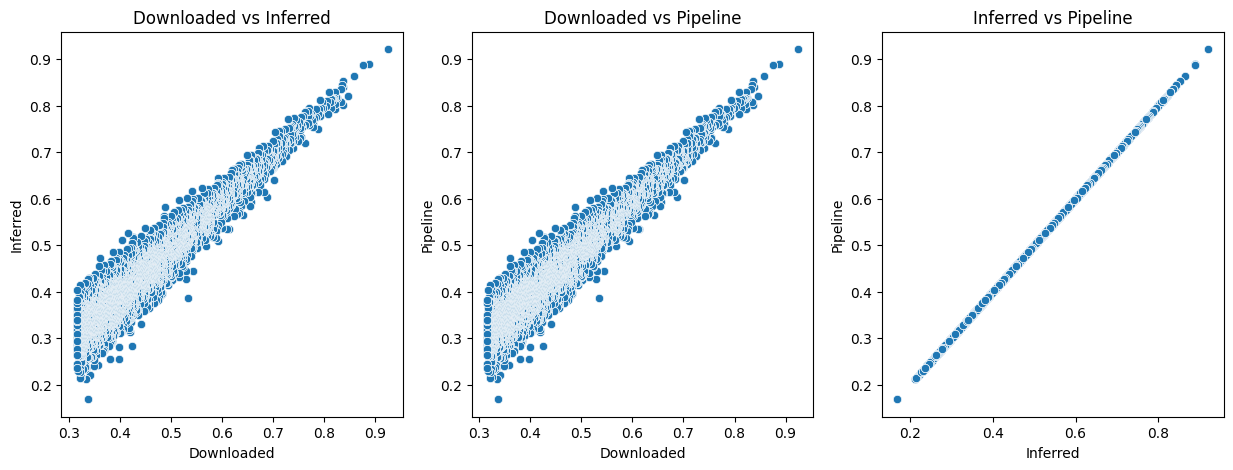

In [58]:
# Plot scatterplots of coaccess values for top connections

# 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# downloaded vs inferred
sns.scatterplot(x=top_downloaded_conns["coaccess"], y=top_inferred_conns["coaccess"], ax=ax[0])
ax[0].set_title("Downloaded vs Inferred")
ax[0].set_xlabel("Downloaded")
ax[0].set_ylabel("Inferred")

# downloaded vs pipeline
sns.scatterplot(x=top_downloaded_conns["coaccess"], y=top_pipeline_conns["coaccess"], ax=ax[1])
ax[1].set_title("Downloaded vs Pipeline")
ax[1].set_xlabel("Downloaded")
ax[1].set_ylabel("Pipeline")

# inferred vs pipeline
sns.scatterplot(x=top_inferred_conns["coaccess"], y=top_pipeline_conns["coaccess"], ax=ax[2])
ax[2].set_title("Inferred vs Pipeline")
ax[2].set_xlabel("Inferred")
ax[2].set_ylabel("Pipeline")